# Impact on Stock Returns: Exploratory Data Analysis

This Jupyter Notebook is designed to explore the "Tweet Sentiment's Impact on Stock Returns" dataset. We'll conduct exploratory data analysis (EDA) to examine patterns, relationships, and trends within the dataset and prepare it for machine learning tasks.

## About the Dataset

This dataset contains 862,231 labeled tweets and associated stock returns, providing a comprehensive look into the impact of social media on company-level stock market performance. For each tweet, researchers have extracted data such as the date of the tweet and its associated stock symbol, along with metrics such as last price and various returns (1-day return, 2-day return, 3-day return, 7-day return). Also recorded are volatility scores for both 10 day intervals and 30 day intervals. Finally, sentiment scores from both Long Short - Term Memory (LSTM) and TextBlob models have been included to quantify the overall tone in which these messages were delivered. With this dataset you will be able to explore how tweets can affect a company's share prices both short term and long term by leveraging all of these data points for analysis!

## Setup Instructions

### Step 1: Import Required Libraries
Before downloading the dataset, ensure you import all the necessary libraries for execution:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset
Load the dataset into a Pandas DataFrame:

In [28]:
# Path to your dataset file
dataset_path = "../data/Impact_on_Stock_Returns/full_dataset-release.csv"

# Load the dataset
df = pd.read_csv(dataset_path, sep=',', encoding='utf-8', low_memory=False)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0
1,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0
2,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.0
3,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.0
4,4,RT @loadsofvans: Retweet this post &amp; follo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 3: Quick Overview
Perform basic checks to understand the structure and contents:

In [7]:
# Check the shape of the dataset (number of rows, columns)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1395450, 14)


In [8]:
# Get column names and data types
print("Column Info:")
print(df.info())

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395450 entries, 0 to 1395449
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1102013 non-null  object 
 1   TWEET              1395398 non-null  object 
 2   STOCK              862231 non-null   object 
 3   DATE               862231 non-null   object 
 4   LAST_PRICE         862231 non-null   float64
 5   1_DAY_RETURN       862231 non-null   float64
 6   2_DAY_RETURN       862231 non-null   float64
 7   3_DAY_RETURN       862231 non-null   float64
 8   7_DAY_RETURN       862231 non-null   float64
 9   PX_VOLUME          862231 non-null   float64
 10  VOLATILITY_10D     862130 non-null   float64
 11  VOLATILITY_30D     862184 non-null   float64
 12  LSTM_POLARITY      661102 non-null   float64
 13  TEXTBLOB_POLARITY  367665 non-null   float64
dtypes: float64(10), object(4)
memory usage: 149.1+ MB
None


In [9]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0            293437
TWEET                     52
STOCK                 533219
DATE                  533219
LAST_PRICE            533219
1_DAY_RETURN          533219
2_DAY_RETURN          533219
3_DAY_RETURN          533219
7_DAY_RETURN          533219
PX_VOLUME             533219
VOLATILITY_10D        533320
VOLATILITY_30D        533266
LSTM_POLARITY         734348
TEXTBLOB_POLARITY    1027785
dtype: int64


In [10]:
# Get basic statistical details
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
          LAST_PRICE   1_DAY_RETURN   2_DAY_RETURN  3_DAY_RETURN  \
count  862231.000000  862231.000000  862231.000000  8.622310e+05   
mean      716.123477       0.001473       0.002579  3.262616e+06   
std      4731.498118       0.023068       0.032594  1.053913e+07   
min        -0.173554      -0.177851      -0.204959 -2.049587e-01   
25%         0.000000      -0.007511      -0.011456 -8.465608e-03   
50%         0.014220       0.000000       0.000000  1.019542e-02   
75%       115.600000       0.008192       0.013911  6.545426e-02   
max    165500.000000       0.243639       0.267113  3.081068e+08   

       7_DAY_RETURN     PX_VOLUME  VOLATILITY_10D  VOLATILITY_30D  \
count  8.622310e+05  8.622310e+05   862130.000000   862184.000000   
mean   6.201036e+06  7.522187e+06       18.293836       10.738204   
std    1.388221e+07  1.591847e+07       16.277630       14.693986   
min   -2.049587e-01  1.000000e+00       -1.000000       -1.000000   
25%    5.474453e-03  2

### Step 4: Visualize Missing Data
Visualize missing values to better understand the dataset's completeness:

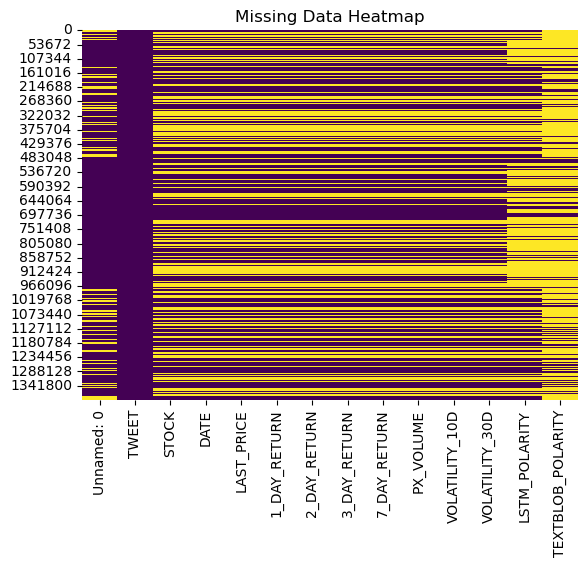

In [11]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

### Step 5: Examine Unique Values
Investigate unique values in categorical columns:

In [12]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values per categorical column
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in Unnamed: 0:
['0' nan '1' ... 862228.0 862229.0 862230.0]
Unique values in TWEET:
['RT @robertoglezcano: @amazon  #Patents Show Flying Warehouses That Send Delivery Drones To Your Door https://t.co/cZwL9QLhoC by… '
 'Amazon'
 '@FAME95FM1 Jamaicans make money with @Payoneer @PayPal, @paxuminc, @ecoPayz and @okpaycom https://t.co/FWzqUrgsqs\r'
 ...
 'RT @Rajesh_waran31: The Recent #Sarkar Announcement Poster Was Shared By @sunpictures In Their Official Facebook Page. Let’s Wait Till They…'
 'Bitch I got to the checkout and I was ready to go to PayPal 🤦🏽\u200d♂️ @SHOPCHEAPYXO'
 'Flat 6000 INR cashback on HDFC debit and credit cards on Samsung Note 9 Hurry! Grab the deal now! https://t.co/1HCCK0jPCI']
Unique values in STOCK:
[nan '31/01/2017' 'PayPal' ... '27/09/2018' '28/09/2018' '29/09/2018']
Unique values in DATE:
[nan '823.48' '31/01/2017' ... '122.28' '70.02' '71.74']


### Step 6: Analyze Distribution
Visualize the distribution of numeric columns:

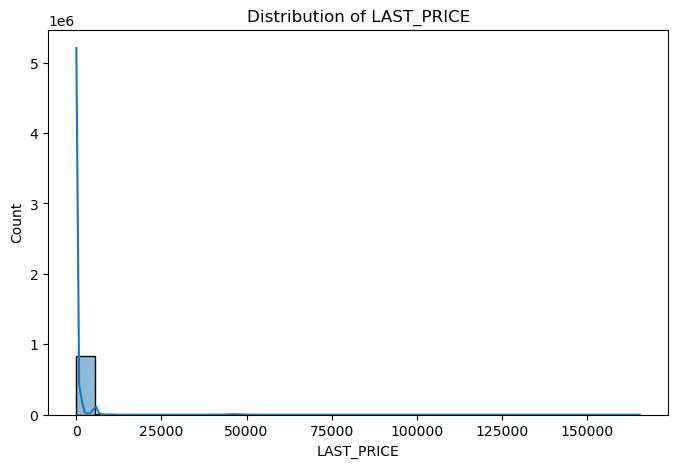

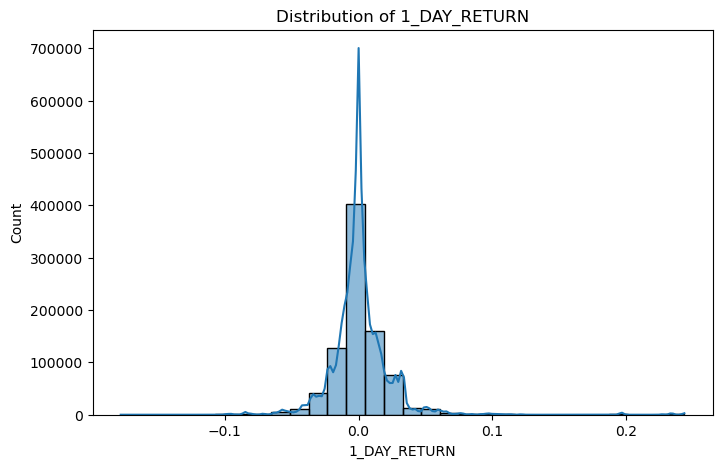

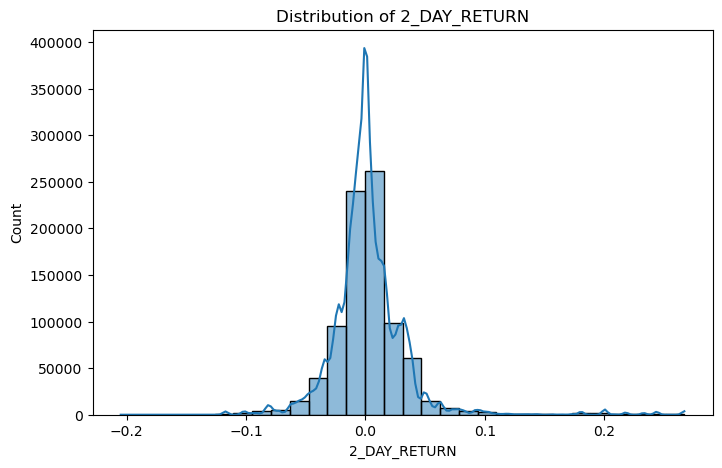

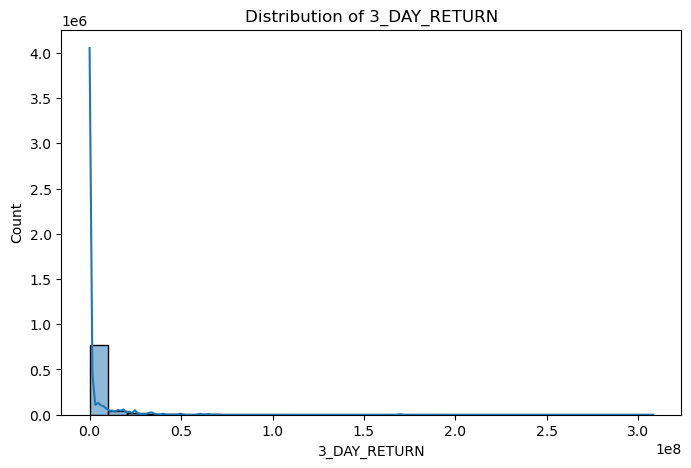

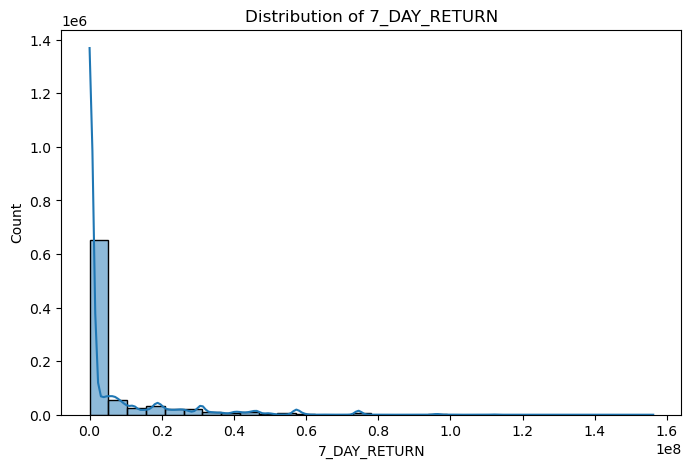

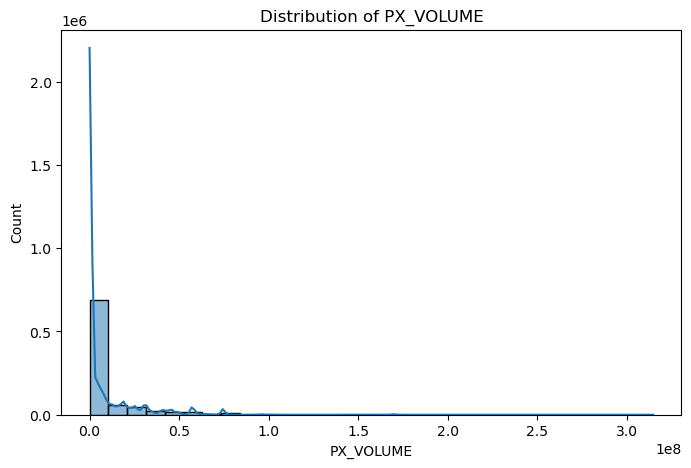

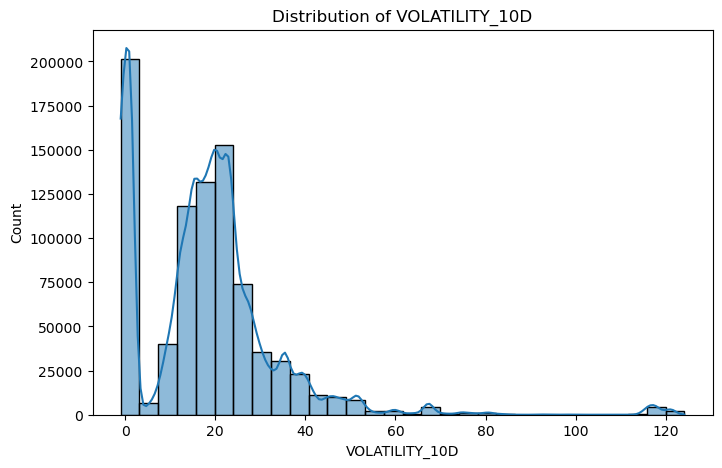

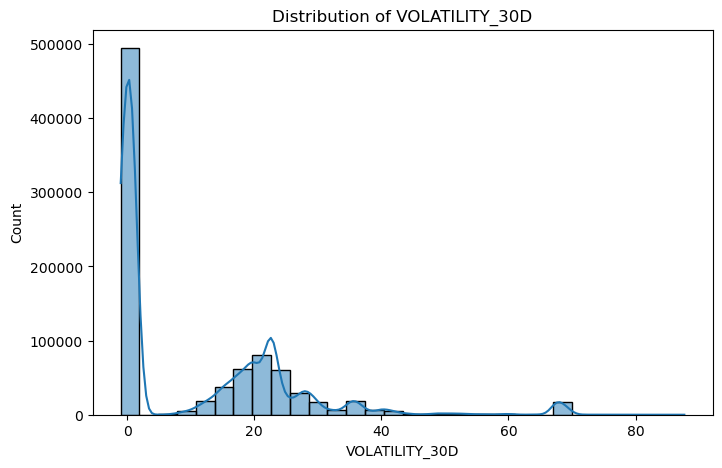

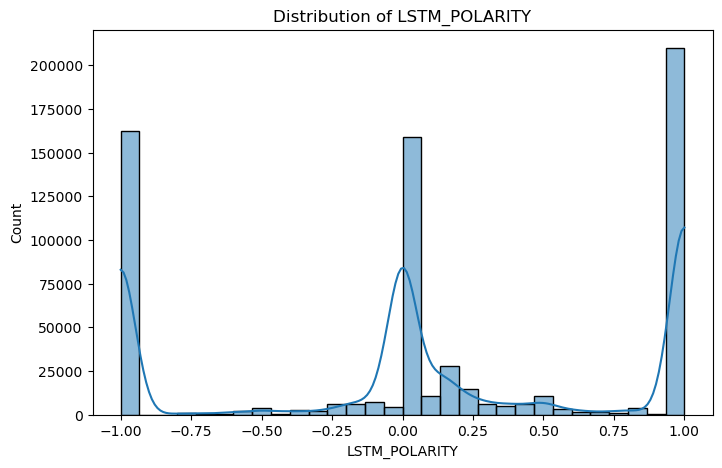

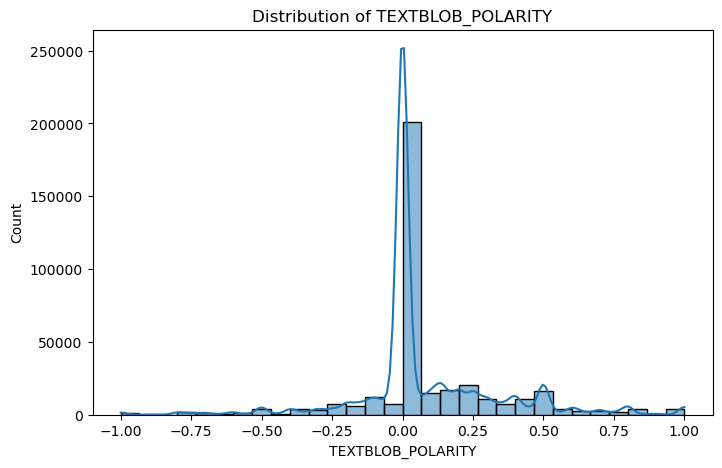

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Step 7: Explore Relationships
Study potential correlations between numeric features:

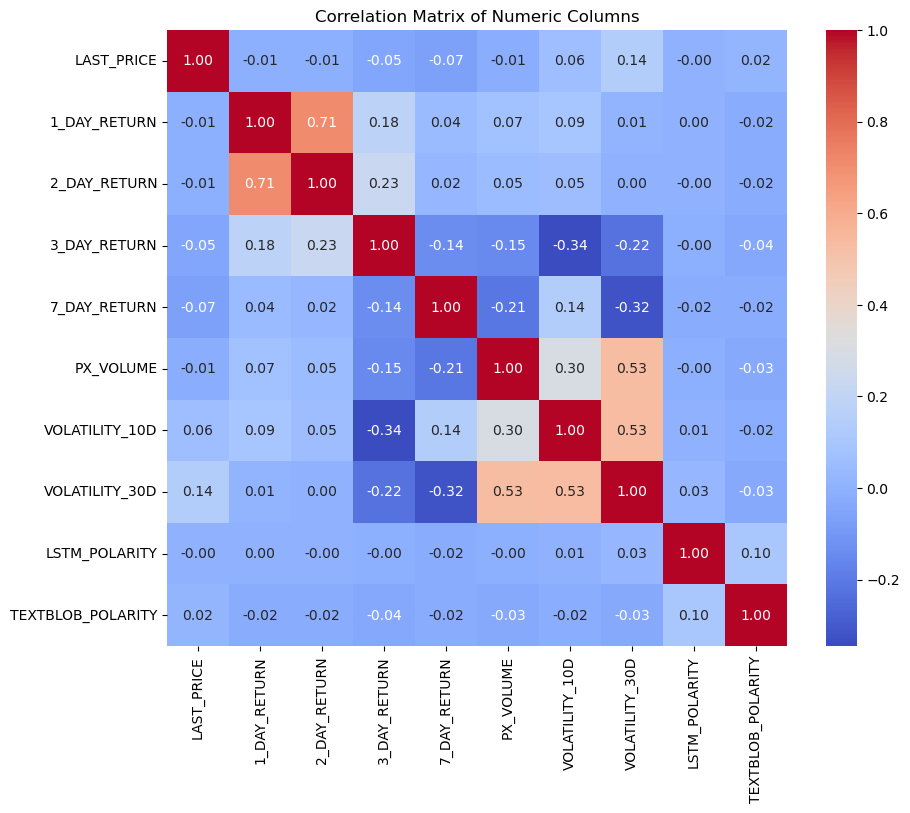

In [15]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Conclusion for Initial EDA Notebook

In this initial exploratory data analysis (EDA), we examined the dataset to better understand its structure and contents. During our analysis, we observed several issues within the dataset, including missing values, outliers, and formatting inconsistencies. These challenges may impact the quality and reliability of further analysis.

These findings highlight the importance of performing data cleaning and preprocessing to refine the dataset. In the next notebook, we will address these issues by implementing data cleaning, ensuring that the data is consistent and ready for deeper analysis.